In [84]:

# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
import pandas as pd

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [32]:
from tensorflow.keras.layers import Dropout

from keras.utils import to_categorical
import tensorflow as tf

In [42]:
data1 = pd.read_csv("/media/nbm/2D08-2980/ICT4D/Historical_code/Again.csv")

In [44]:
data1

,Age,Gender,Marital_Status,Job,Education,Work_Experience,Type_of_Loan,Annual_Income,Coapplicant_Income,Total_Income,Duration_of_Loan,A,Loan_History,Loan_Grade,Amount_of_Loan,Loan_int_rate,Loan_Status
0,22,0,1,0,1,3,0,59000,11500,70500,180,0,1,3,35000,16.02,1
1,21,0,0,1,0,5,1,9600,3000,12600,300,0,2,1,1000,11.14,0
2,25,0,0,0,1,1,1,9600,16500,26100,300,0,3,2,5500,12.87,1
3,23,0,0,2,0,4,1,65500,16425,81925,300,0,3,2,35000,15.23,1
4,24,1,1,3,0,8,2,54400,16400,70800,144,0,3,2,35000,14.27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,26,1,0,0,0,0,3,47000,2500,49500,60,0,3,0,16500,6.92,1
5996,23,0,1,0,2,5,1,47000,2500,49500,60,0,4,1,16500,10.62,1
5997,22,0,1,0,2,6,1,48000,3250,51250,60,0,3,0,16500,8.90,1
5998,25,0,1,0,1,2,3,25000,2500,27500,120,0,4,0,1500,6.76,0


In [45]:

data = data1.drop(columns=['Loan_Status'])

In [56]:
x = data1.iloc[:, :-1].values
print(X)

[[2.200e+01 0.000e+00 1.000e+00 ... 3.000e+00 3.500e+04 1.602e+01]
 [2.100e+01 0.000e+00 0.000e+00 ... 1.000e+00 1.000e+03 1.114e+01]
 [2.500e+01 0.000e+00 0.000e+00 ... 2.000e+00 5.500e+03 1.287e+01]
 ...
 [2.200e+01 0.000e+00 1.000e+00 ... 0.000e+00 1.650e+04 8.900e+00]
 [2.500e+01 0.000e+00 1.000e+00 ... 0.000e+00 1.500e+03 6.760e+00]
 [2.500e+01 1.000e+00 0.000e+00 ... 3.000e+00 1.650e+04 1.280e+01]]


In [58]:
data=x

In [52]:
y = data1.iloc[:, -1].values
print(y)

[1 0 1 ... 1 0 1]


In [53]:
y.shape

(6000,)

In [41]:
data.shape

(6000, 16)

In [48]:
datay=pd.read_csv('/media/nbm/2D08-2980/ICT4D/Historical_code/Again.csv',index_col='Loan_Status')

In [49]:
datay

,Age,Gender,Marital_Status,Job,Education,Work_Experience,Type_of_Loan,Annual_Income,Coapplicant_Income,Total_Income,Duration_of_Loan,A,Loan_History,Loan_Grade,Amount_of_Loan,Loan_int_rate
Loan_Status,,,,,,,,,,,,,,,,
1,22,0,1,0,1,3,0,59000,11500,70500,180,0,1,3,35000,16.02
0,21,0,0,1,0,5,1,9600,3000,12600,300,0,2,1,1000,11.14
1,25,0,0,0,1,1,1,9600,16500,26100,300,0,3,2,5500,12.87
1,23,0,0,2,0,4,1,65500,16425,81925,300,0,3,2,35000,15.23
1,24,1,1,3,0,8,2,54400,16400,70800,144,0,3,2,35000,14.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,26,1,0,0,0,0,3,47000,2500,49500,60,0,3,0,16500,6.92
1,23,0,1,0,2,5,1,47000,2500,49500,60,0,4,1,16500,10.62
1,22,0,1,0,2,6,1,48000,3250,51250,60,0,3,0,16500,8.90


In [11]:
arr = data.to_numpy()

In [12]:
arr.shape

(6000, 17)

In [60]:
x_train_r=data.reshape(data.shape[0],1, data.shape[1]) 

In [61]:
x_train_r.shape

(6000, 1, 16)

In [62]:
n_timesteps,n_features=x_train_r.shape[1],x_train_r.shape[2]

In [63]:
print(n_features)

16


In [67]:
trainy = to_categorical(y)

In [68]:
trainy

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [64]:
n_outputs=2

In [65]:
model = Sequential()
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'))
model.add(Dropout(0.5))
model.add(tf.keras.layers.MaxPool1D(pool_size=1))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [129]:
input_shape

(1, 16)

In [66]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 1, 64)             1088      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 1, 64)             4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [79]:
his=model.fit(x_train_r[:5000], trainy[:5000], epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
141/141 [==============================] - 0s 987us/step - loss: 0.5918 - accuracy: 0.6907 - val_loss: 0.4426 - val_accuracy: 0.8660
Epoch 2/10
141/141 [==============================] - 0s 953us/step - loss: 0.5723 - accuracy: 0.6933 - val_loss: 0.5157 - val_accuracy: 0.8660
Epoch 3/10
141/141 [==============================] - 0s 835us/step - loss: 0.5726 - accuracy: 0.6880 - val_loss: 0.3978 - val_accuracy: 0.8700
Epoch 4/10
141/141 [==============================] - 0s 882us/step - loss: 0.5678 - accuracy: 0.6884 - val_loss: 0.3607 - val_accuracy: 0.9040
Epoch 5/10
141/141 [==============================] - 0s 1ms/step - loss: 0.5852 - accuracy: 0.6851 - val_loss: 0.3594 - val_accuracy: 0.8700
Epoch 6/10
141/141 [==============================] - 0s 918us/step - loss: 0.5388 - accuracy: 0.7118 - val_loss: 0.3485 - val_accuracy: 0.8880
Epoch 7/10
141/141 [==============================] - 0s 875us/step - loss: 0.5626 - accuracy: 0.6958 - val_loss: 0.3457 - val_accuracy: 0

In [80]:
acc=model.evaluate(x_train_r[5000:], trainy[5000:], batch_size=32)

32/32 [==============================] - 0s 474us/step - loss: 0.4415 - accuracy: 0.8160


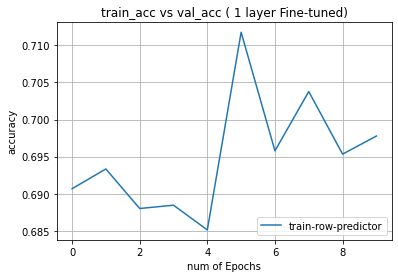

In [86]:
trr_acc = his.history['accuracy']
valr_acc = his.history['val_accuracy']
epochs=range(10)


# to print training  accuracy vs validation accuracy
plt.plot(epochs, trr_acc)
#plt.plot(epochs, valr_acc)

plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc ( 1 layer Fine-tuned)')
plt.grid(True)
plt.legend(['train-row-predictor', 'val-row-predictor','train-column-predictor', 'val-column-predictor'], loc=4)
plt.show()

In [87]:
pred = model.predict(x_train_r[5000:])

In [90]:
import numpy as np

In [92]:
# model_0 fine tune
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = pred.argmax(axis=-1)
y_true = [np.argmax(p) for p in trainy[5000:]]
#finetune 1
print(classification_report(y_true, y_pred))
matrix = confusion_matrix(y_true, y_pred)
acceach1=matrix.diagonal()/matrix.sum(axis=1)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       496
           1       0.88      0.74      0.80       504

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.81      1000
weighted avg       0.82      0.82      0.81      1000



In [93]:
print(matrix)

[[445  51]
 [133 371]]


In [76]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, to_file='1DTamiru.png')

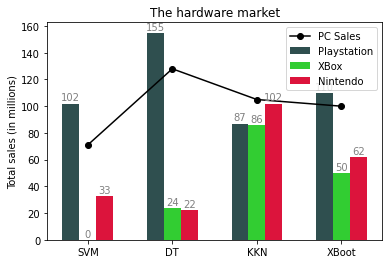

In [98]:
import  matplotlib.pyplot as plt

def autolabel(rectangle_group):
	for rect in rectangle_group:
		height = rect.get_height()

		ax.annotate(str(height),
			xy = (rect.get_x() + rect.get_width() / 2,height),
			ha = 'center',
			xytext = (0,3),textcoords = 'offset points',
			color = 'grey')
        

phases      = ['SVM','DT','KKN','XBoot']
playstation = [102      , 155      , 87     , 110       ]
xbox        = [0        , 24       , 86     , 50        ]
nintendo    = [33       , 22       , 102    , 62        ]
pc_sales    = [71       , 128      , 105    , 100      ]

# MSE = [102      , 155      , 87     , 110       ]
# MAE        = [0        , 24       , 86     , 50        ]
# RMSE    = [33       , 22       , 102    , 62        ]
# R2    = [71       , 128      , 240    , 316       ]


width = 0.2
x_playstation = [x - width for x in range(len(playstation))]
x_xbox        = [x for x in range(len(xbox))]
x_nintendo = [x + width for x in range(len(nintendo))]

fig,ax = plt.subplots()

rect1 = ax.bar(x_playstation, playstation,width, label = 'Playstation',color = 'darkslategray')
rect2 = ax.bar(x_xbox,xbox,width,label = 'XBox',color = 'limegreen')
rect3 = ax.bar(x_nintendo,nintendo,width,label = 'Nintendo',color = 'crimson')
ax.plot(phases,pc_sales,label = 'PC Sales',color = 'black',marker = 'o')

ax.set_title('The hardware market')
ax.set_ylabel('Total sales (in millions)')
ax.legend()

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

plt.show()